In [ ]:
import os
import pandas as pd
import numpy as np


In [ ]:
# Import & Read Dataset
path=r"/content/male_players_football.csv"
data = pd.read_csv(path)

# Display Dataset Information
data.info()

<ipython-input-4-78cb7adcff88>:3: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72365 entries, 0 to 72364
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 60.7+ MB


##  Introduction:
    
**Player Clustering and Analysis**

Understanding the Complexities of Football Players

Football is a complex sport characterized by a wide range of player attributes and roles. To gain deeper insights into player performance and potential, this project aims to cluster football players based on their characteristics using unsupervised machine learning techniques.

By applying clustering algorithms, we seek to identify distinct groups of players with similar attributes, enabling a more granular analysis of player profiles. This clustering approach will help in:

Player scouting and recruitment: Identifying players with specific skill sets to fill team needs.
Performance analysis: Comparing players within clusters to identify strengths and weaknesses.
Tactical analysis: Understanding player roles and interactions within different formations.
This project will utilize a dataset containing comprehensive player information, including attributes such as pace, shooting, passing, dribbling, defending, physicality, and more. By employing clustering techniques like K-Means and DBSCAN, we will explore different approaches to player segmentation and analyze the resulting clusters.

Ultimately, this project aims to provide valuable insights into player characteristics and contribute to a better understanding of the dynamics of football.

## Data Description:

The dataset comprises 25,000 entries (rows) and 110 columns, which capture various attributes and performance metrics of football players. The data is divided into two main sections:


**Numerical Attributes (48 columns):**

These columns include both player performance metrics (e.g., pace, shooting, passing, dribbling, defending) and physical attributes (e.g., height, weight, age).

The data contains some missing values, particularly in columns like value_eur, wage_eur, and attributes related to goalkeeping and mentality.

Key variables include:

Performance Metrics: pace, shooting, passing, dribbling, defending, physic, etc.
Physical Attributes: height_cm, weight_kg, age.
Goalkeeping Metrics: goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, etc.
Categorical Attributes (17 columns):

These columns provide information about the player's identity, position, club, nationality, and other non-numerical characteristics.

Includes attributes such as:

Player Identity: short_name, long_name.
Player Position and Club Information: player_positions, club_name, club_position, nation_position.
Player Characteristics: preferred_foot, work_rate, body_type, real_face.
Some columns have significant missing data, such as club_loaned_from, player_tags, nation_position.


## Objectives:

**Primary Objectives:**

Identify distinct player archetypes: To uncover inherent groupings within the dataset based on player attributes, leading to the creation of player clusters or segments.

Analyze player characteristics: To understand the key attributes that differentiate player clusters and identify potential correlations between player traits and performance.

Evaluate clustering algorithms: To compare the effectiveness of K-Means and DBSCAN in segmenting players based on the given dataset and identify the most suitable algorithm for the task.

**Secondary Objectives:**

Optimize clustering parameters: To fine-tune the parameters of the selected clustering algorithm (e.g., number of clusters for K-Means, epsilon and minPts for DBSCAN) to improve clustering results.

Visualize cluster distributions: To create visual representations of the clusters to gain insights into player distributions and potential overlaps.

Explore potential applications: To identify potential use cases for the clustering results, such as player scouting, team building, or performance analysis.


## Managerial Insights:

Understanding Player Profiles and Building Effective Teams
By identifying distinct player archetypes through clustering, football clubs can gain valuable insights to optimize team composition and performance:

Targeted Recruitment:

Identify player profiles that align with specific team needs, such as a creative midfielder or a defensive stalwart.
Focus recruitment efforts on players who fit these identified archetypes to strengthen the squad.
Positional Flexibility:

Analyze player profiles within clusters to identify players with multiple skill sets, enabling them to play in different positions.
This flexibility can enhance tactical adaptability and provide depth to the squad.
Performance Evaluation:

Benchmark players against others within their cluster to assess individual performance relative to peers.
Identify areas for improvement or potential development based on cluster analysis.

Injury Management:

Analyze the impact of injuries on cluster composition and team performance.
Develop strategies to mitigate the effects of injuries by identifying suitable replacements within existing player profiles.

Youth Development:

Identify young players with potential to fit specific player archetypes.
Develop tailored training programs to enhance their skills and accelerate their development.
Tactical Implications
Formation Optimization:

Analyze player clusters to identify optimal formations that maximize the strengths of the team.
Experiment with different formations based on opponent strengths and weaknesses.
Player Substitution:

Use cluster analysis to determine suitable substitutes based on the current game situation and the characteristics of the players on the field.
Set Piece Strategies:

Identify players with specific skills (e.g., crossing, heading, free-kick accuracy) to design effective set piece routines.
By leveraging the insights gained from player clustering, football clubs can make data-driven decisions to improve team performance, optimize player utilization, and ultimately achieve greater success.





In [ ]:
data.head(10)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png
5,41,/player/41/andres-iniesta-lujan/150002,15,2,2014-09-18,Iniesta,Andrés Iniesta Luján,"CM, LW",89,89,...,77+3,77+3,76+3,70+3,63+3,63+3,63+3,70+3,14+3,https://cdn.sofifa.net/players/000/041/15_120.png
6,176580,/player/176580/luis-suarez/150002,15,2,2014-09-18,L. Suárez,Luis Alberto Suárez Díaz,"ST, CF",89,91,...,67+3,67+3,67+3,62+3,57+3,57+3,57+3,62+3,34+3,https://cdn.sofifa.net/players/176/580/15_120.png
7,7826,/player/7826/robin-van-persie/150002,15,2,2014-09-18,R. van Persie,Robin van Persie,ST,88,88,...,63+3,63+3,60+3,54+3,48+3,48+3,48+3,54+3,13+3,https://cdn.sofifa.net/players/007/826/15_120.png
8,121944,/player/121944/bastian-schweinsteiger/150002,15,2,2014-09-18,B. Schweinsteiger,Bastian Schweinsteiger,"CM, CDM",88,88,...,84+2,84+2,81+2,81+2,79+2,79+2,79+2,81+2,18+2,https://cdn.sofifa.net/players/121/944/15_120.png
9,156616,/player/156616/franck-ribery/150002,15,2,2014-09-18,F. Ribéry,Franck Bilal Ribéry,LM,88,88,...,63+2,63+2,63+2,53+2,44+2,44+2,44+2,53+2,14+2,https://cdn.sofifa.net/players/156/616/15_120.png


In [ ]:
# Set the random seed based on the user's roll number
roll_number_seed = 42

# Sample 5000 random records from the dataset
sampled_data = data.sample(n=25000, random_state=roll_number_seed)


In [ ]:
sampled_data.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,25000.000000,25000.000000,25000.0,25000.000000,25000.000000,2.459700e+04,24682.000000,25000.000000,25000.000000,25000.000000,...,13689.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,2700.000000
mean,198948.813240,16.682480,2.0,65.967200,70.568160,2.171050e+06,14093.063771,25.117120,181.150800,75.438240,...,58.208562,45.014360,47.851040,46.036040,16.447120,16.151520,16.02300,16.191400,16.585520,41.898148
std,36337.189588,1.218475,0.0,7.428276,6.533515,5.036051e+06,25145.454444,4.652031,6.684705,6.953828,...,13.361667,20.986161,21.452345,21.106697,17.653022,16.665214,16.24198,16.885812,17.956324,9.667671
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.000000,16.000000,155.000000,49.000000,...,11.000000,3.000000,4.000000,4.000000,1.000000,1.000000,1.00000,1.000000,1.000000,12.000000
25%,186532.500000,16.000000,2.0,61.000000,66.000000,2.400000e+05,2000.000000,21.000000,177.000000,70.000000,...,50.000000,25.000000,26.000000,25.000000,8.000000,8.000000,8.00000,8.000000,8.000000,36.000000
50%,207555.000000,17.000000,2.0,66.000000,70.000000,6.250000e+05,5000.000000,25.000000,181.000000,75.000000,...,60.000000,48.000000,53.000000,51.000000,11.000000,11.000000,11.00000,11.000000,11.000000,43.000000
75%,223332.500000,18.000000,2.0,71.000000,75.000000,1.800000e+06,15000.000000,28.000000,186.000000,80.000000,...,68.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.00000,14.000000,14.000000,48.000000
max,254664.000000,19.000000,2.0,94.000000,95.000000,1.185000e+08,575000.000000,44.000000,204.000000,110.000000,...,95.000000,92.000000,92.000000,91.000000,91.000000,92.000000,92.00000,90.000000,94.000000,67.000000


In [ ]:
sampled_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 26931 to 31082
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 21.2+ MB


In [ ]:
# Calculate the percentage of missing values for each row
missing_percent_rows = (sampled_data .isnull().sum(axis=1) / data.shape[1]) * 100

# Filter out rows with more than 50% missing values
rows_to_keep = missing_percent_rows[missing_percent_rows <= 50].index
filtered_data_rows = sampled_data .loc[rows_to_keep]

filtered_data_rows


# Now 'filtered_data_rows' contains only the rows with less than or equal to 50% missing values
# You can further process or analyze this cleaned dataset as needed

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
26931,215501,/player/215501/eldis-bajrami/160002,16,2,2015-09-21,E. Bajrami,Eldis Bajrami,"RM, CAM",63,68,...,44,44,50,46,37,37,37,46,15,https://cdn.sofifa.net/players/215/501/16_120.png
64791,198057,/player/198057/elliott-frear/180002,18,2,2017-09-18,E. Frear,Elliott Thomas Frear,"LM, LWB",60,61,...,43+1,43+1,50+1,47+1,36+1,36+1,36+1,47+1,15+1,https://cdn.sofifa.net/players/198/057/18_120.png
57146,160175,/player/160175/miguel-asterga/180002,18,2,2017-09-18,M. Asterga,Miguel Asterga,RB,68,68,...,63+1,63+1,68,67+1,60+1,60+1,60+1,67+1,15+1,https://cdn.sofifa.net/players/160/175/18_120.png
55052,218471,/player/218471/min-woo-kim/180002,18,2,2017-09-18,Kim Min Woo,김민우 金敏佑,"LM, CM",71,71,...,68+1,68+1,69+1,68+1,64+1,64+1,64+1,68+1,17+1,https://cdn.sofifa.net/players/218/471/18_120.png
38178,219715,/player/219715/raffaele-di-gennaro/170002,17,2,2016-09-20,R. Di Gennaro,Raffaele Di Gennaro,GK,70,78,...,27+1,27+1,27+1,27+1,26+1,26+1,26+1,27+1,69+1,https://cdn.sofifa.net/players/219/715/17_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,223887,/player/223887/julian-salamon/150002,15,2,2014-09-18,J. Salamon,Julian Salamon,ST,57,62,...,38,38,39,38,37,37,37,38,12,https://cdn.sofifa.net/players/223/887/15_120.png
12172,210502,/player/210502/manuel-kuttin/150002,15,2,2014-09-18,M. Kuttin,Manuel Kuttin,GK,59,66,...,30,30,28,27,32,32,32,27,59,https://cdn.sofifa.net/players/210/502/15_120.png
41376,135454,/player/135454/eric-marester/170002,17,2,2016-09-20,E. Marester,Eric Marester,RB,66,66,...,63+1,63+1,65+1,65+1,63+1,63+1,63+1,65+1,17+1,https://cdn.sofifa.net/players/135/454/17_120.png
20360,194082,/player/194082/flavio-emmanuel-lopes-paixao/16...,16,2,2015-09-21,Flavio Paixão,Flavio Emmanuel Lopes Paixão,RM,70,70,...,52,52,54,50,44,44,44,50,18,https://cdn.sofifa.net/players/194/082/16_120.png


In [ ]:
numerical_cols = filtered_data_rows[[
    "overall", "potential", "value_eur", "wage_eur", "age", "height_cm",
    "weight_kg", "pace", "shooting", "passing", "dribbling", "defending",
    "physic", "attacking_crossing", "attacking_finishing",
    "attacking_heading_accuracy", "attacking_short_passing",
    "attacking_volleys", "skill_dribbling", "skill_curve",
    "skill_fk_accuracy", "skill_long_passing", "skill_ball_control",
    "movement_acceleration", "movement_sprint_speed", "movement_agility",
    "movement_reactions", "movement_balance", "power_shot_power",
    "power_jumping", "power_stamina", "power_strength", "power_long_shots",
    "mentality_aggression", "mentality_interceptions", "mentality_positioning",
    "mentality_vision", "mentality_penalties", "mentality_composure",
    "defending_marking_awareness", "defending_standing_tackle",
    "defending_sliding_tackle", "goalkeeping_diving", "goalkeeping_handling",
    "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes",
    "goalkeeping_speed"
]]



numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 26931 to 31082
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      25000 non-null  int64  
 1   potential                    25000 non-null  int64  
 2   value_eur                    24597 non-null  float64
 3   wage_eur                     24682 non-null  float64
 4   age                          25000 non-null  int64  
 5   height_cm                    25000 non-null  int64  
 6   weight_kg                    25000 non-null  int64  
 7   pace                         22300 non-null  float64
 8   shooting                     22300 non-null  float64
 9   passing                      22300 non-null  float64
 10  dribbling                    22300 non-null  float64
 11  defending                    22300 non-null  float64
 12  physic                       22300 non-null  float64
 13  attacking_crossin

In [ ]:
numerical_cols

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,pace,shooting,passing,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
26931,63,68,450000.0,4000.0,22,172,62,69.0,60.0,57.0,...,NaN,24,25,29,13,11,14,8,8,NaN
64791,60,61,240000.0,2000.0,26,173,64,82.0,48.0,53.0,...,41.0,31,32,28,12,7,9,13,15,NaN
57146,68,68,350000.0,3000.0,33,166,62,76.0,55.0,66.0,...,73.0,73,61,70,8,11,9,7,9,NaN
55052,71,71,2500000.0,8000.0,27,172,69,72.0,62.0,68.0,...,60.0,62,63,65,11,6,14,16,10,NaN
38178,70,78,1700000.0,2000.0,22,185,78,NaN,NaN,NaN,...,24.0,16,19,16,71,67,59,67,74,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,57,62,150000.0,3000.0,23,175,70,65.0,60.0,37.0,...,NaN,25,25,25,6,14,12,8,10,NaN
12172,59,66,100000.0,2000.0,20,194,96,NaN,NaN,NaN,...,NaN,25,25,24,59,57,56,59,61,45.0
41376,66,66,350000.0,2000.0,32,172,67,73.0,54.0,63.0,...,61.0,63,64,61,9,16,11,12,12,NaN
20360,70,70,1200000.0,20000.0,30,184,75,73.0,65.0,65.0,...,NaN,24,17,21,11,16,16,9,11,NaN


In [ ]:
categorical_cols = filtered_data_rows[[
    "short_name", "long_name", "player_positions", "club_name", "club_position",
    "club_loaned_from", "nationality_name", "preferred_foot", "work_rate",
    "body_type", "real_face", "player_tags", "player_traits", "league_name",
    "club_joined_date", "club_contract_valid_until_year", "nation_position"
]]

categorical_cols['club_contract_valid_until_year'] = categorical_cols['club_contract_valid_until_year'].astype('str')
categorical_cols.info()



<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 26931 to 31082
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   short_name                      25000 non-null  object
 1   long_name                       25000 non-null  object
 2   player_positions                25000 non-null  object
 3   club_name                       24679 non-null  object
 4   club_position                   24679 non-null  object
 5   club_loaned_from                1567 non-null   object
 6   nationality_name                25000 non-null  object
 7   preferred_foot                  25000 non-null  object
 8   work_rate                       25000 non-null  object
 9   body_type                       25000 non-null  object
 10  real_face                       25000 non-null  object
 11  player_tags                     2178 non-null   object
 12  player_traits                   11566 non-null 

<ipython-input-12-bac2cf88a519>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_cols['club_contract_valid_until_year'] = categorical_cols['club_contract_valid_until_year'].astype('str')


## Data Preprocessing:

## For categorical


In [ ]:
#Missing Data

# Calculate the percentage of missing values for each categorical column
missing_percent = (categorical_cols.isnull().sum() / len(categorical_cols)) * 100

# Filter out columns with more than 50% missing values
columns_to_keep = missing_percent[missing_percent <= 50].index
filtered_categorical_cols = categorical_cols[columns_to_keep]

# Now 'filtered_categorical_cols' contains only the columns with less than or equal to 50% missing values
# You can further process or analyze this cleaned categorical dataset as needed

#Missing Data Treatment

filtered_categorical_cols.fillna(filtered_categorical_cols.mode(), inplace=True)
filtered_categorical_cols.info()





<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 26931 to 31082
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   short_name                      25000 non-null  object
 1   long_name                       25000 non-null  object
 2   player_positions                25000 non-null  object
 3   club_name                       24679 non-null  object
 4   club_position                   24679 non-null  object
 5   nationality_name                25000 non-null  object
 6   preferred_foot                  25000 non-null  object
 7   work_rate                       25000 non-null  object
 8   body_type                       25000 non-null  object
 9   real_face                       25000 non-null  object
 10  league_name                     24679 non-null  object
 11  club_joined_date                23112 non-null  object
 12  club_contract_valid_until_year  25000 non-null 

<ipython-input-13-959a022109d1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_categorical_cols.fillna(filtered_categorical_cols.mode(), inplace=True)


## Data Encodeded

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical columns
encoded_categorical_cols = ordinal_encoder.fit_transform(filtered_categorical_cols)

# Convert the encoded data back to a DataFrame
encoded_categorical_cols_df = pd.DataFrame(encoded_categorical_cols, columns=filtered_categorical_cols.columns)

# Display the information of the encoded DataFrame
encoded_categorical_cols_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   short_name                      25000 non-null  float64
 1   long_name                       25000 non-null  float64
 2   player_positions                25000 non-null  float64
 3   club_name                       24679 non-null  float64
 4   club_position                   24679 non-null  float64
 5   nationality_name                25000 non-null  float64
 6   preferred_foot                  25000 non-null  float64
 7   work_rate                       25000 non-null  float64
 8   body_type                       25000 non-null  float64
 9   real_face                       25000 non-null  float64
 10  league_name                     24679 non-null  float64
 11  club_joined_date                23112 non-null  float64
 12  club_contract_valid_until_year  

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]


## For Non-categorical


In [ ]:
# Calculate the percentage of missing values for each numerical column

missing_percent_numerical = (numerical_cols.isnull().sum() / len(numerical_cols)) * 100

# Filter out columns that has less than 50% missing values
numerical_columns_to_keep = missing_percent_numerical[missing_percent_numerical <= 50].index
filtered_numerical_cols = numerical_cols[numerical_columns_to_keep]


# Impute missing values with the median
filtered_numerical_cols.fillna(filtered_numerical_cols.median(), inplace=True)

filtered_numerical_cols

<ipython-input-16-1a5adfd05278>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_numerical_cols.fillna(filtered_numerical_cols.median(), inplace=True)


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,pace,shooting,passing,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
26931,63,68,450000.0,4000.0,22,172,62,69.0,60.0,57.0,...,56,60.0,24,25,29,13,11,14,8,8
64791,60,61,240000.0,2000.0,26,173,64,82.0,48.0,53.0,...,49,41.0,31,32,28,12,7,9,13,15
57146,68,68,350000.0,3000.0,33,166,62,76.0,55.0,66.0,...,55,73.0,73,61,70,8,11,9,7,9
55052,71,71,2500000.0,8000.0,27,172,69,72.0,62.0,68.0,...,53,60.0,62,63,65,11,6,14,16,10
38178,70,78,1700000.0,2000.0,22,185,78,69.0,55.0,58.0,...,25,24.0,16,19,16,71,67,59,67,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,57,62,150000.0,3000.0,23,175,70,65.0,60.0,37.0,...,56,60.0,25,25,25,6,14,12,8,10
12172,59,66,100000.0,2000.0,20,194,96,69.0,55.0,58.0,...,25,60.0,25,25,24,59,57,56,59,61
41376,66,66,350000.0,2000.0,32,172,67,73.0,54.0,63.0,...,61,61.0,63,64,61,9,16,11,12,12
20360,70,70,1200000.0,20000.0,30,184,75,73.0,65.0,65.0,...,68,60.0,24,17,21,11,16,16,9,11


In [ ]:
filtered_numerical_cols.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,pace,shooting,passing,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.00000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000
mean,65.967200,70.568160,2.146127e+06,13977.400000,25.117120,181.150800,75.438240,68.35844,52.87312,57.144080,...,49.828120,59.019080,45.014360,47.851040,46.036040,16.447120,16.151520,16.02300,16.191400,16.585520
std,7.428276,6.533515,4.999087e+06,25005.782947,4.652031,6.684705,6.953828,10.53314,13.26326,10.363915,...,15.634397,9.927236,20.986161,21.452345,21.106697,17.653022,16.665214,16.24198,16.885812,17.956324
min,40.000000,40.000000,1.000000e+03,500.000000,16.000000,155.000000,49.000000,22.00000,14.00000,20.000000,...,7.000000,11.000000,3.000000,4.000000,4.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,61.000000,66.000000,2.500000e+05,2000.000000,21.000000,177.000000,70.000000,63.00000,44.00000,51.000000,...,40.000000,59.000000,25.000000,26.000000,25.000000,8.000000,8.000000,8.00000,8.000000,8.000000
50%,66.000000,70.000000,6.250000e+05,5000.000000,25.000000,181.000000,75.000000,69.00000,55.00000,58.000000,...,51.000000,60.000000,48.000000,53.000000,51.000000,11.000000,11.000000,11.00000,11.000000,11.000000
75%,71.000000,75.000000,1.800000e+06,15000.000000,28.000000,186.000000,80.000000,75.00000,62.00000,64.000000,...,62.000000,61.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.00000,14.000000,14.000000
max,94.000000,95.000000,1.185000e+08,575000.000000,44.000000,204.000000,110.000000,96.00000,93.00000,93.000000,...,96.000000,95.000000,92.000000,92.000000,91.000000,91.000000,92.000000,92.00000,90.000000,94.000000


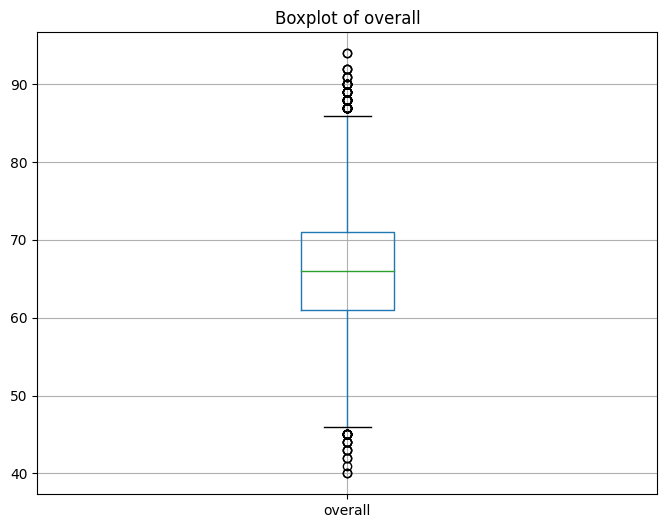

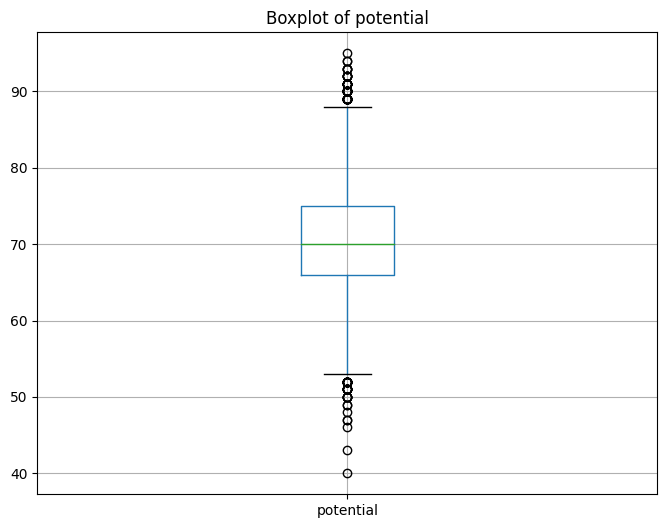

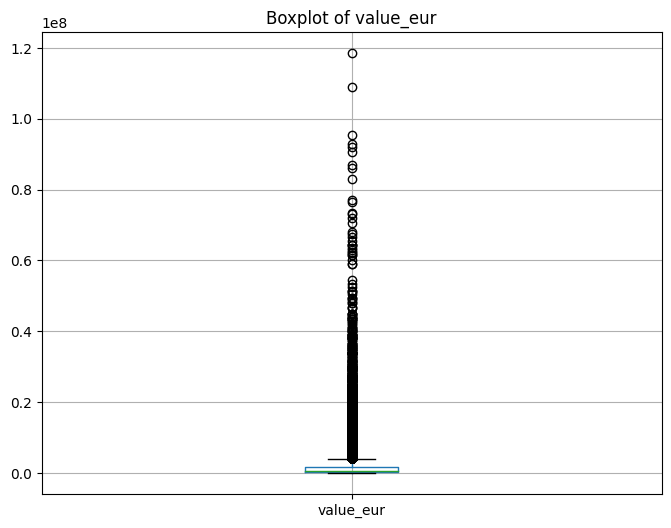

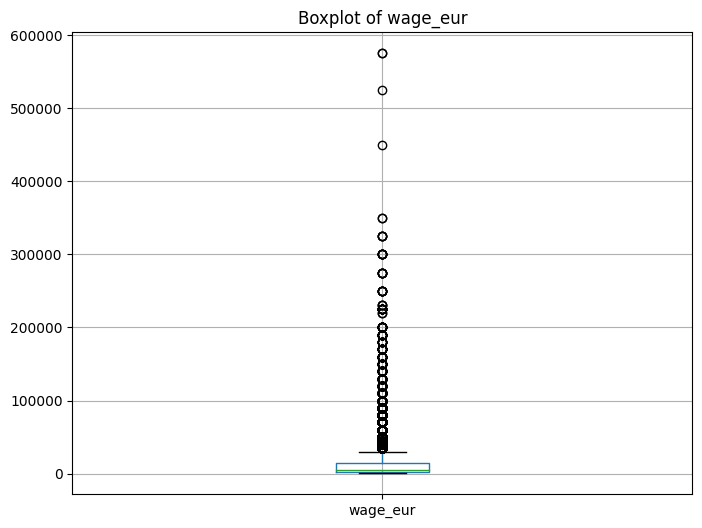

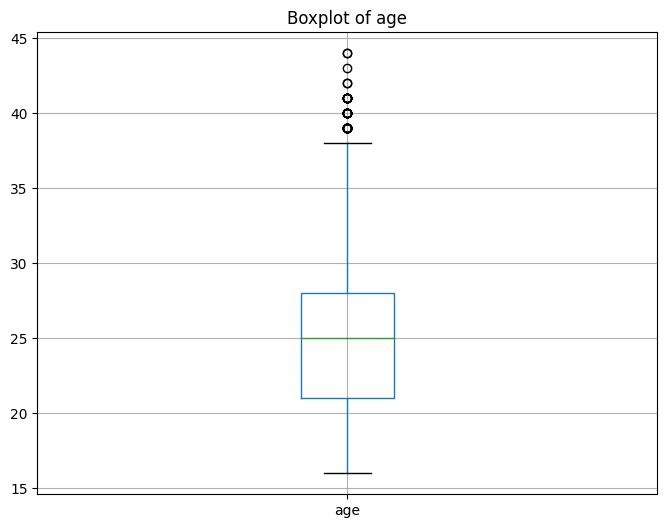

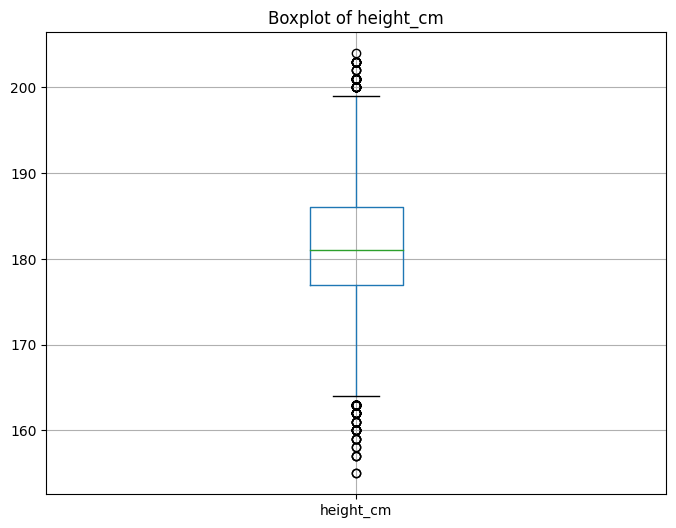

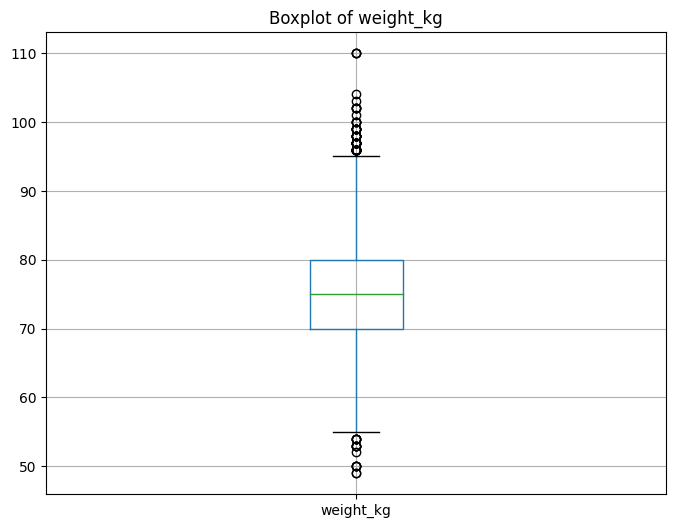

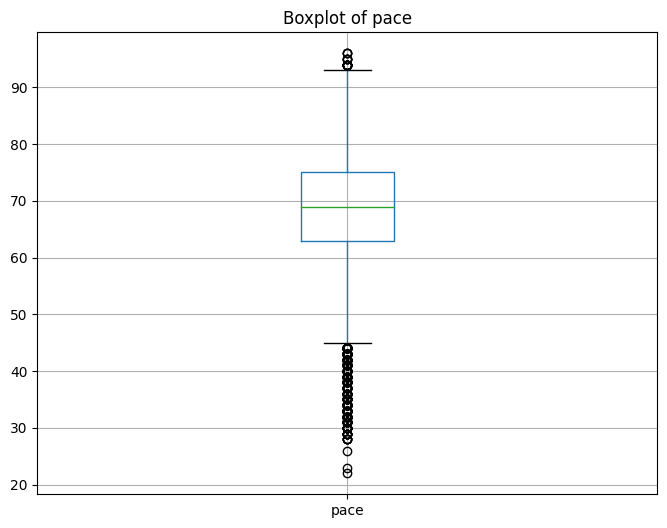

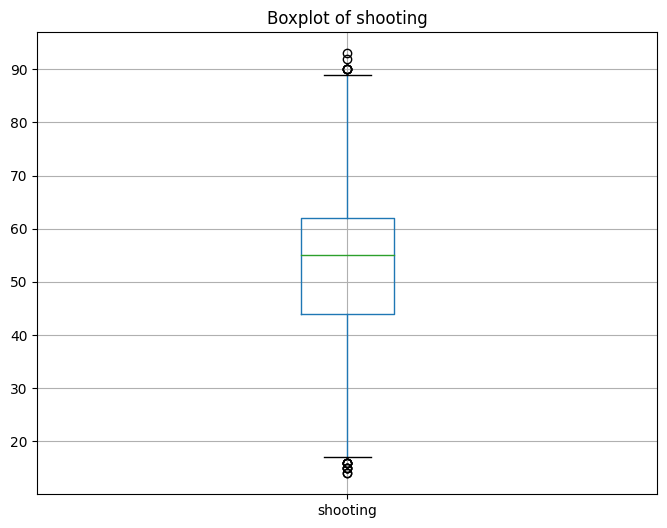

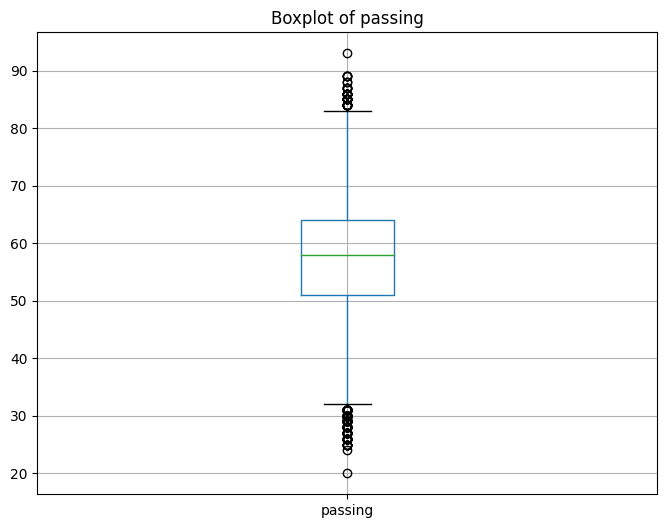

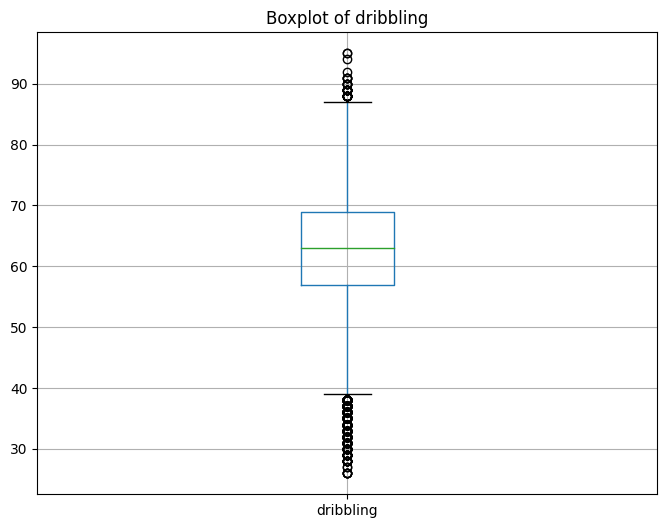

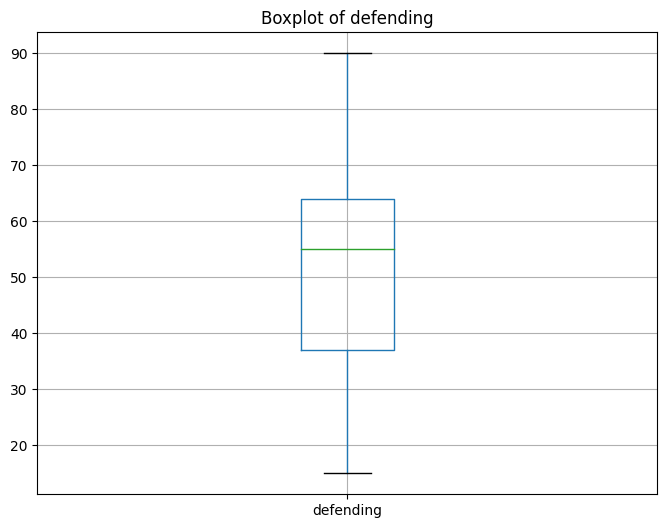

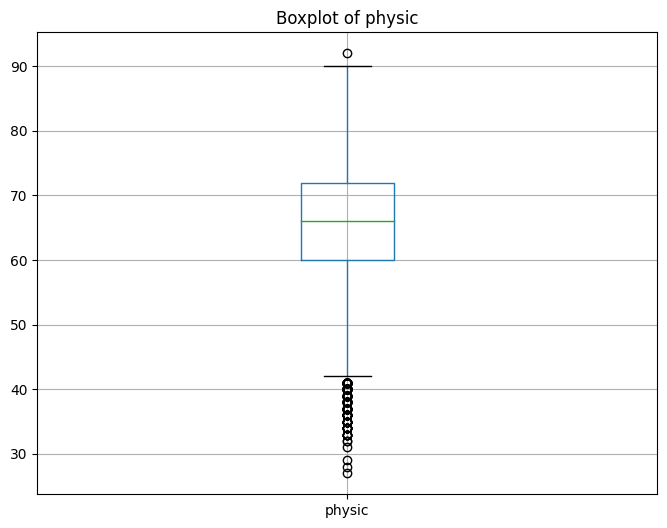

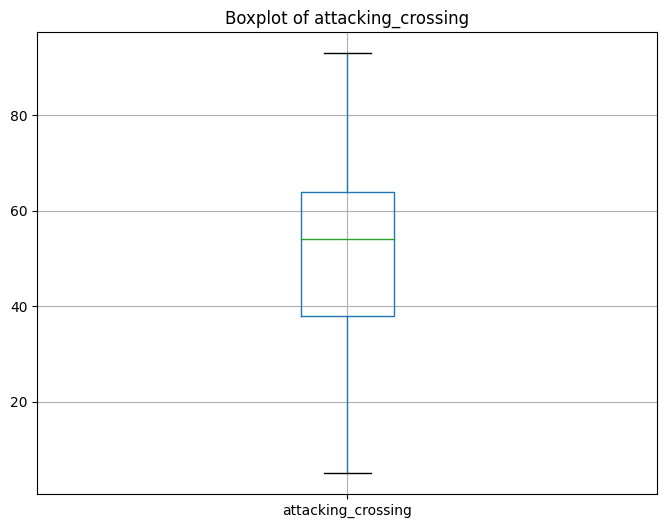

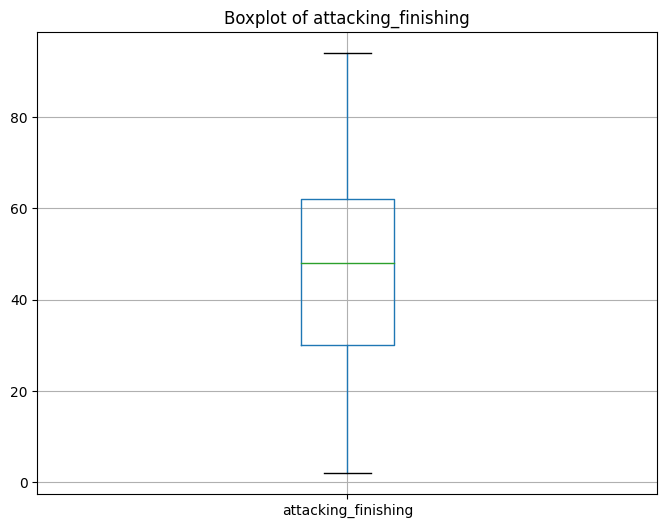

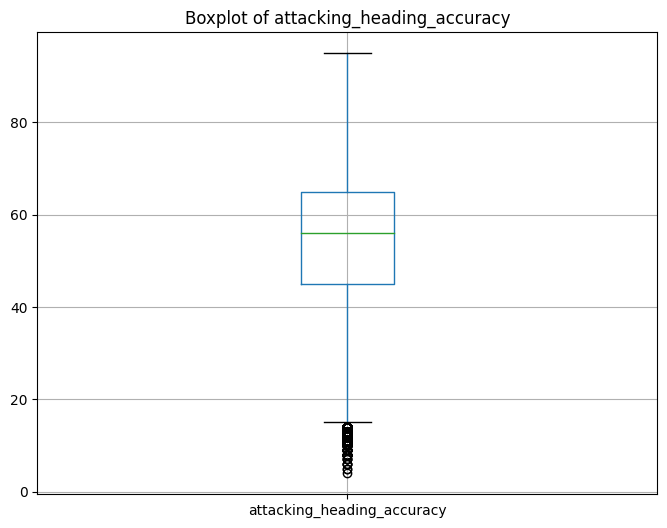

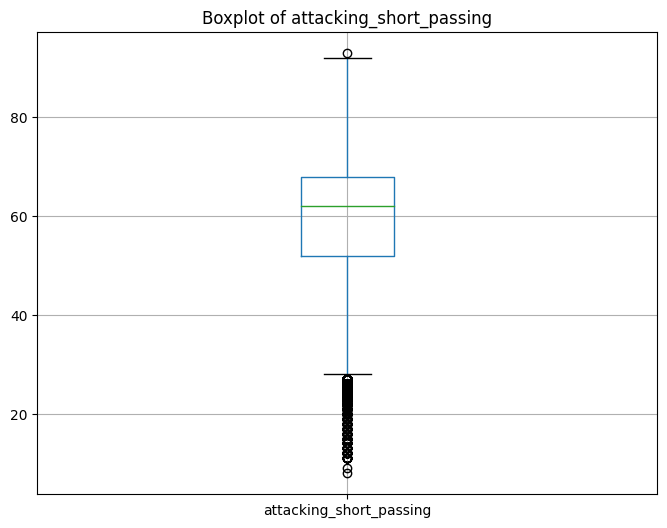

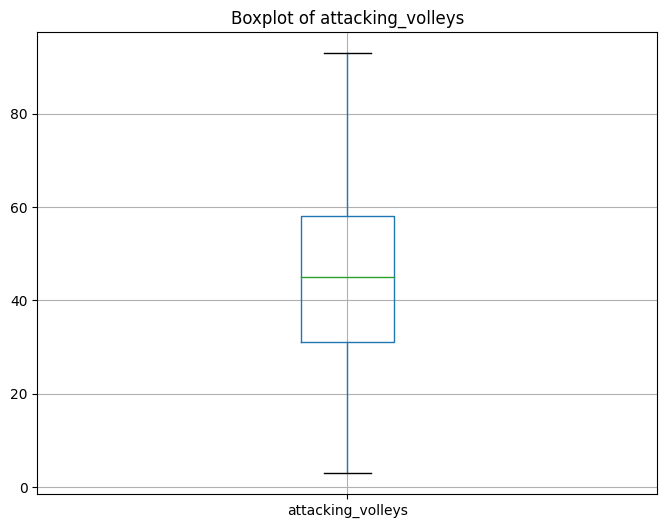

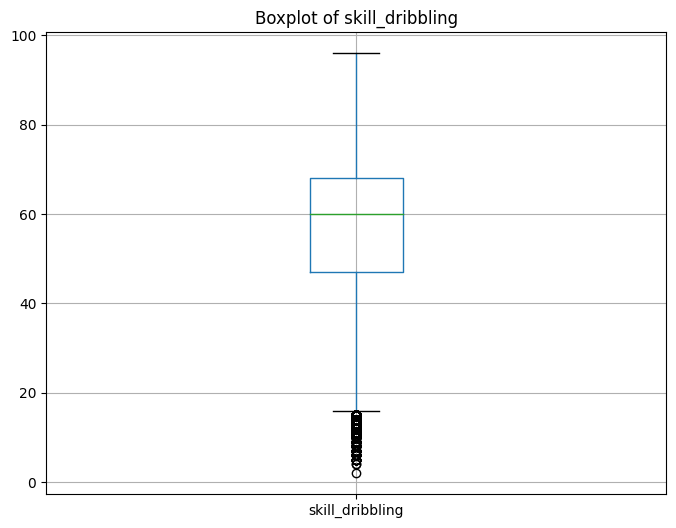

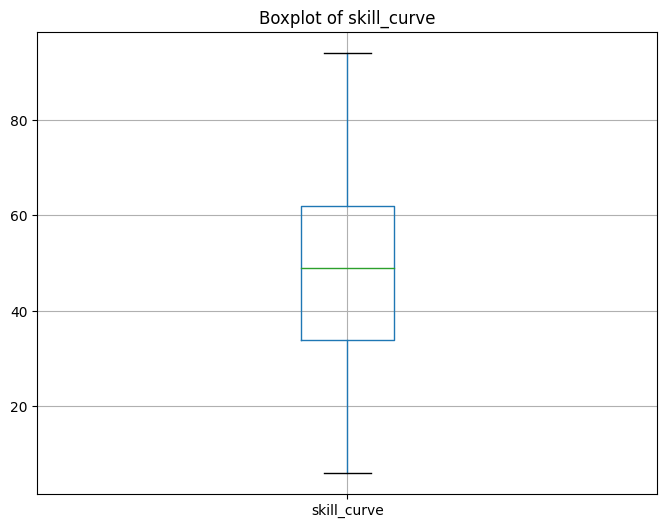

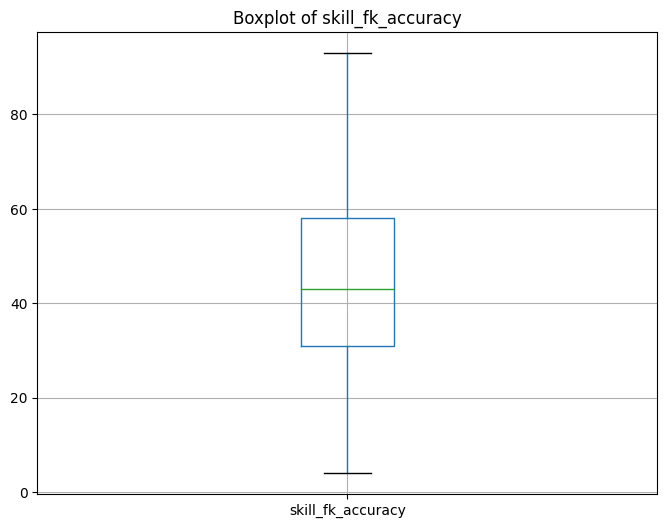

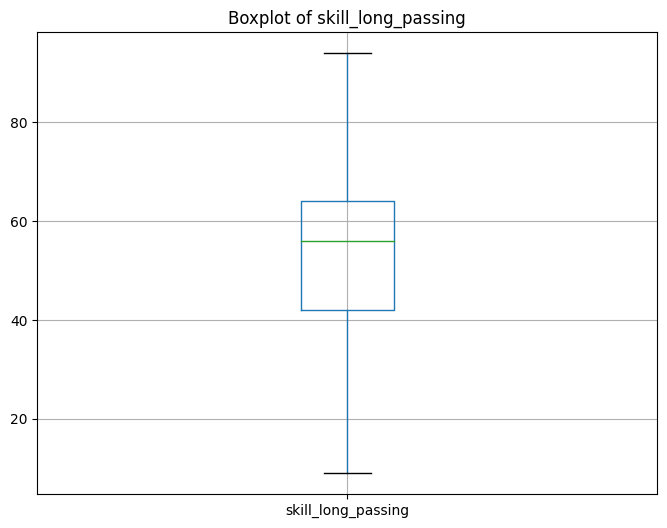

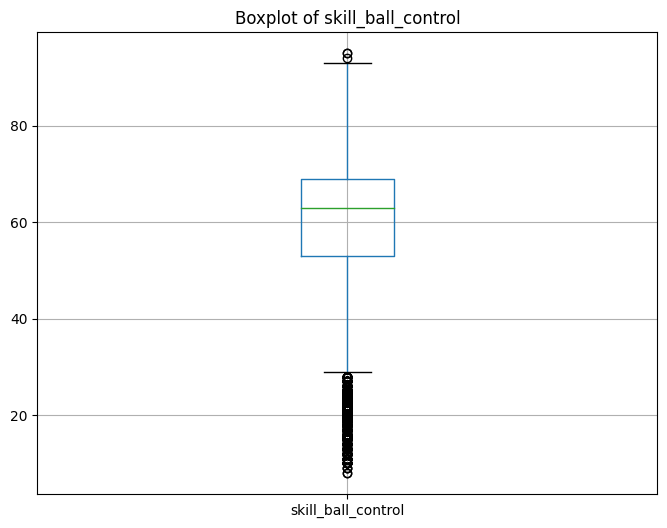

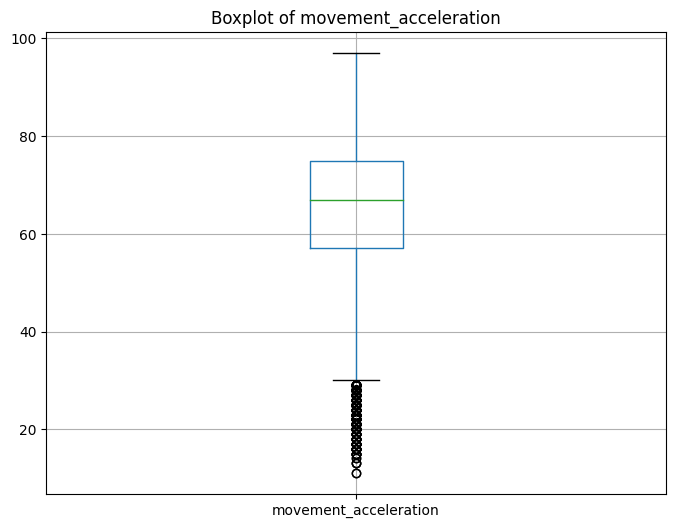

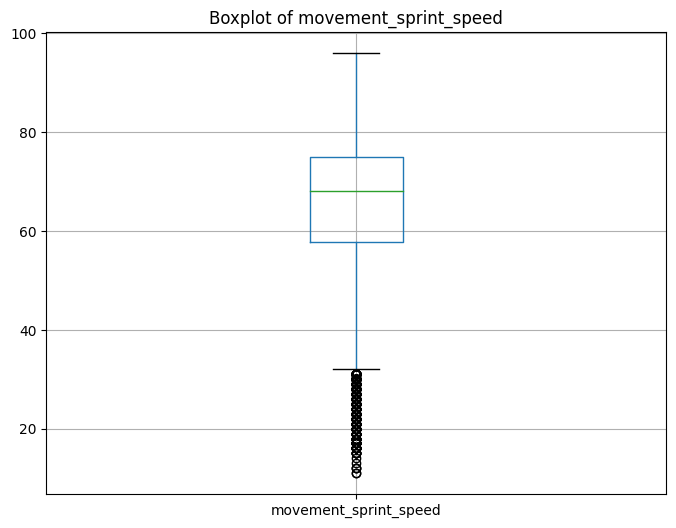

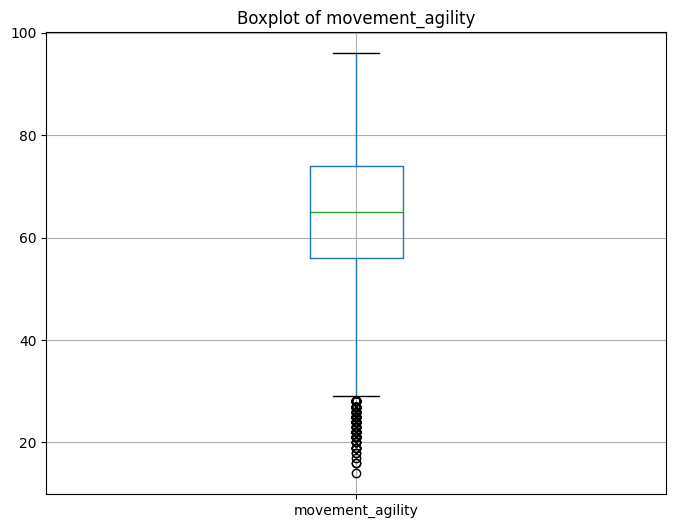

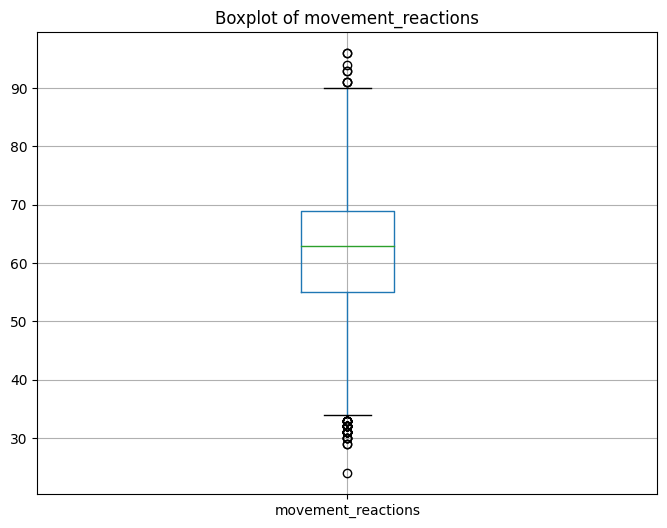

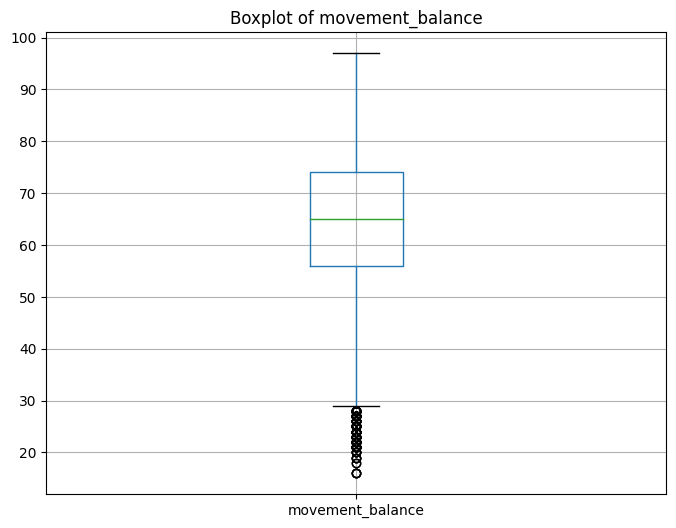

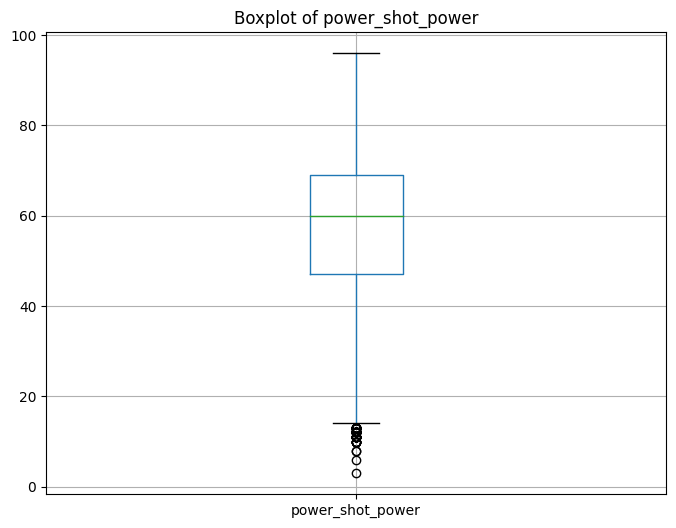

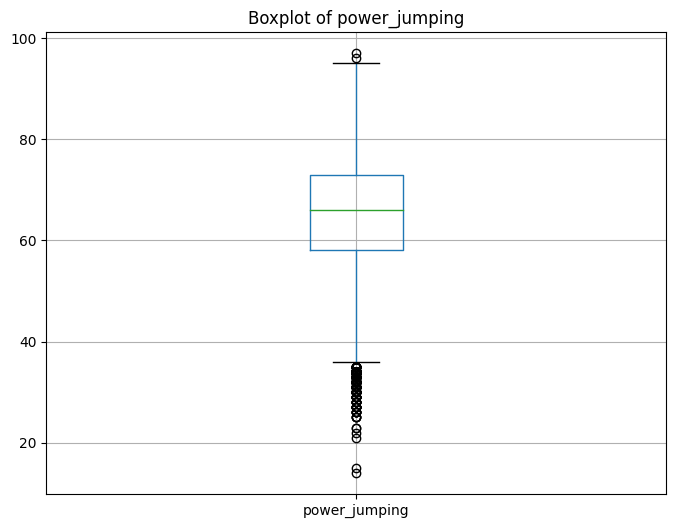

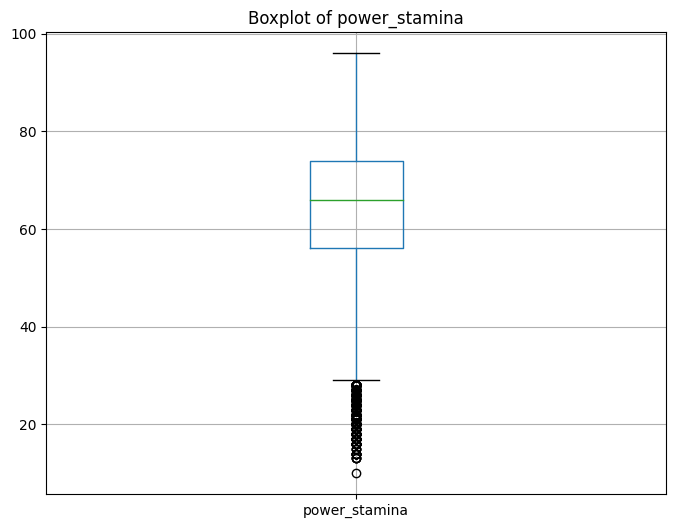

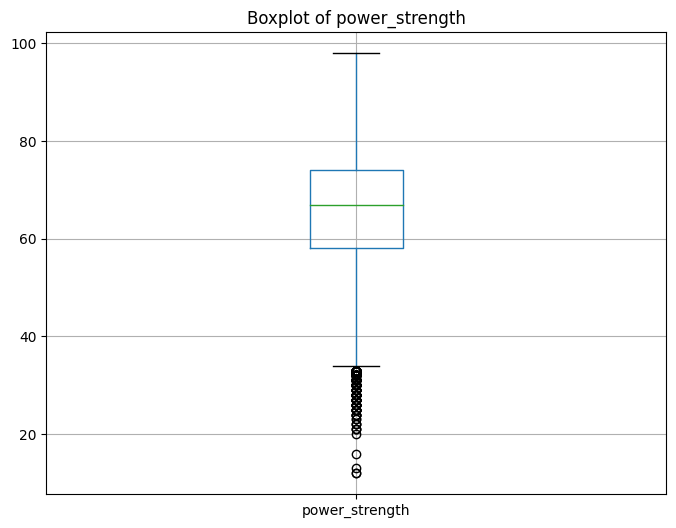

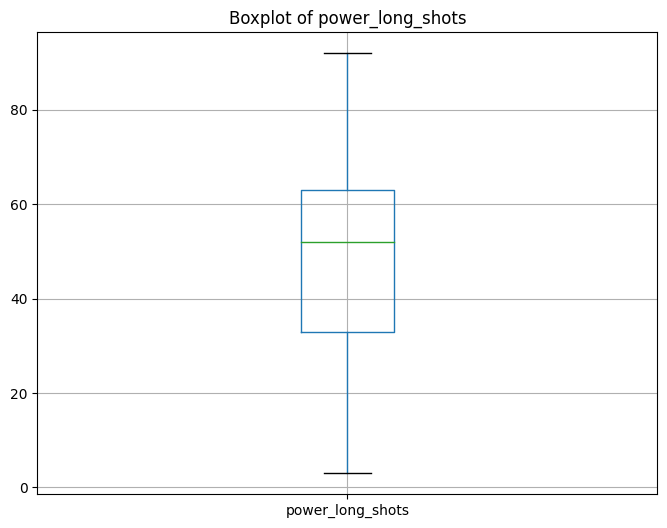

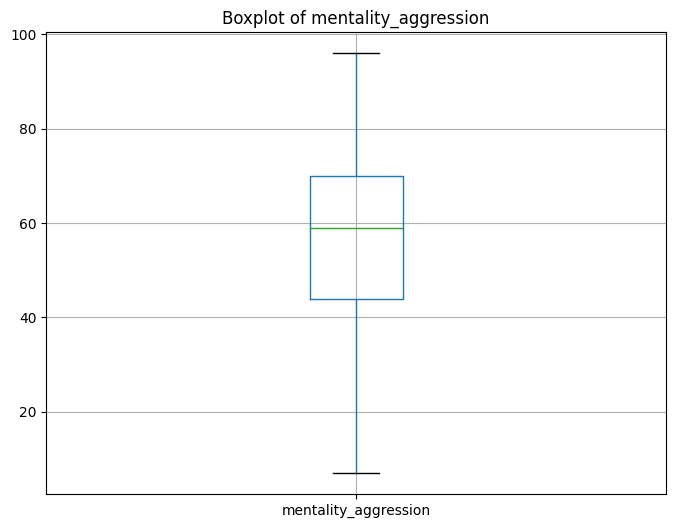

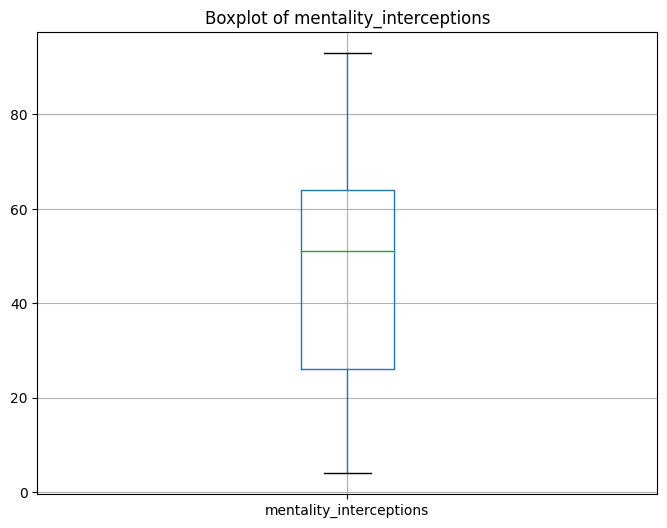

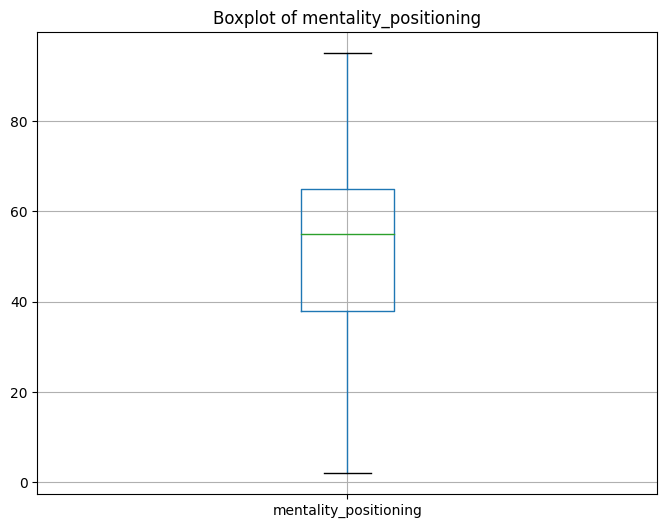

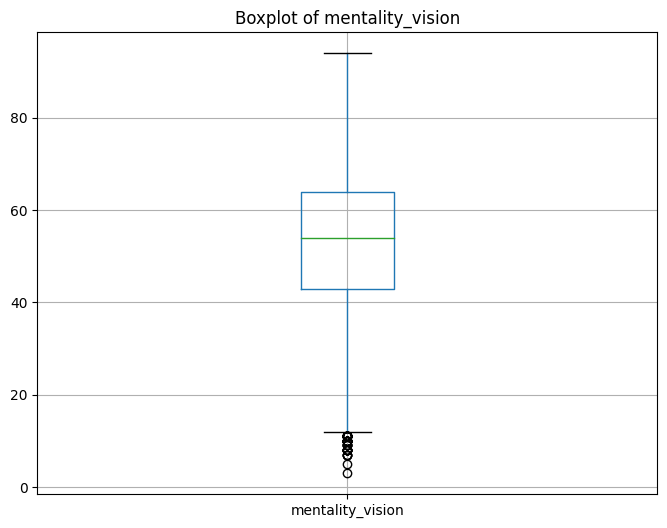

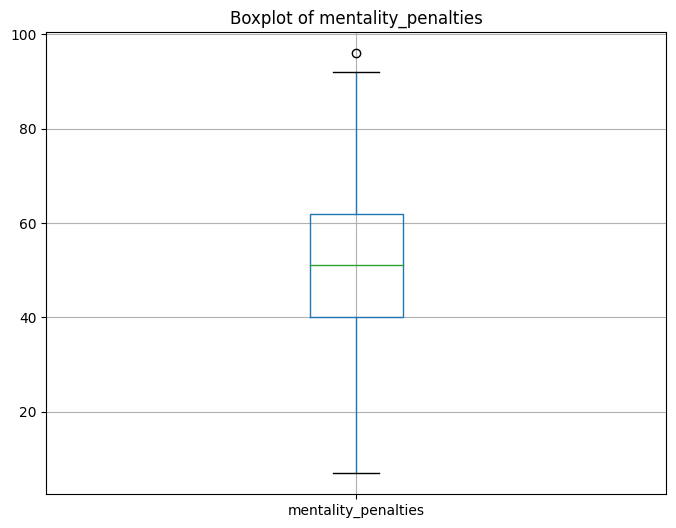

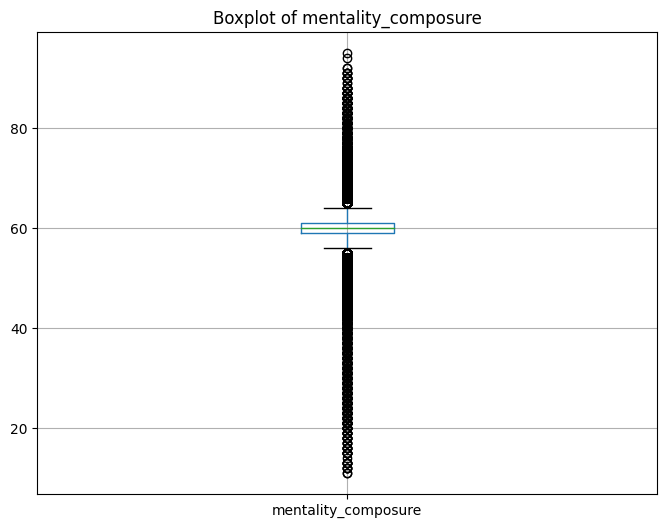

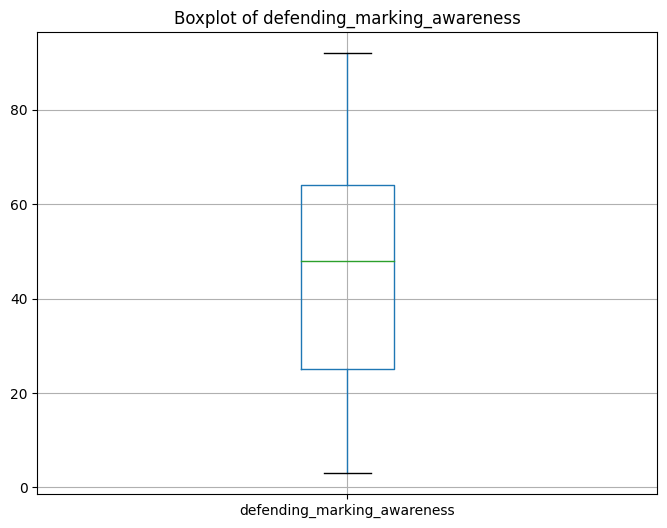

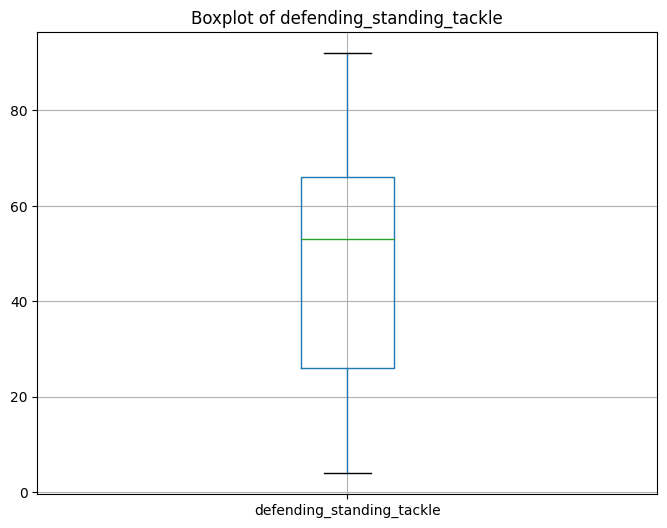

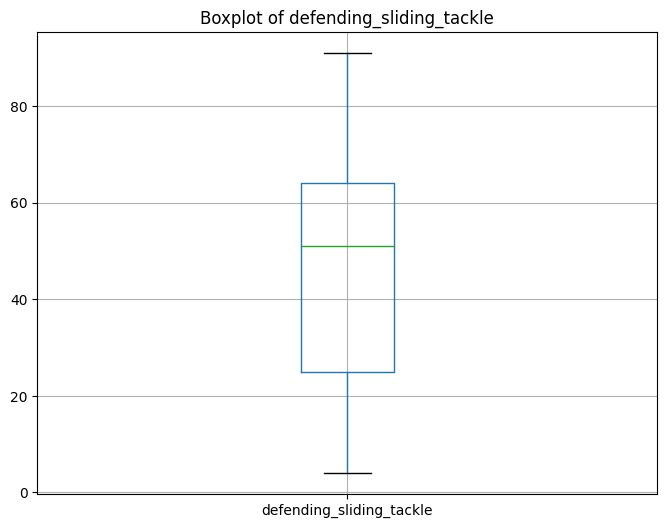

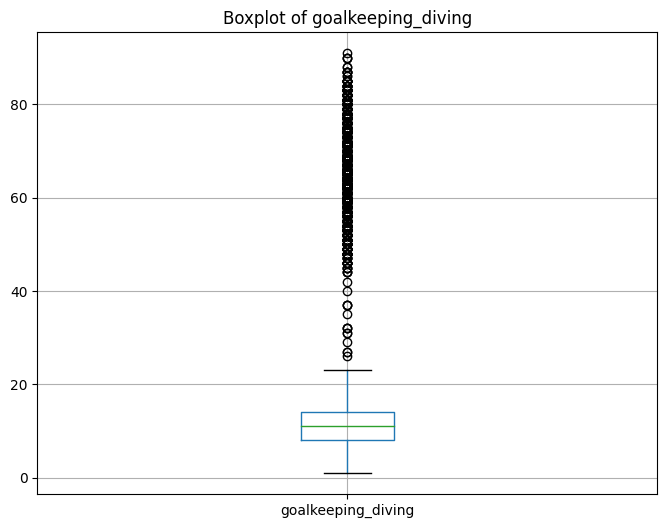

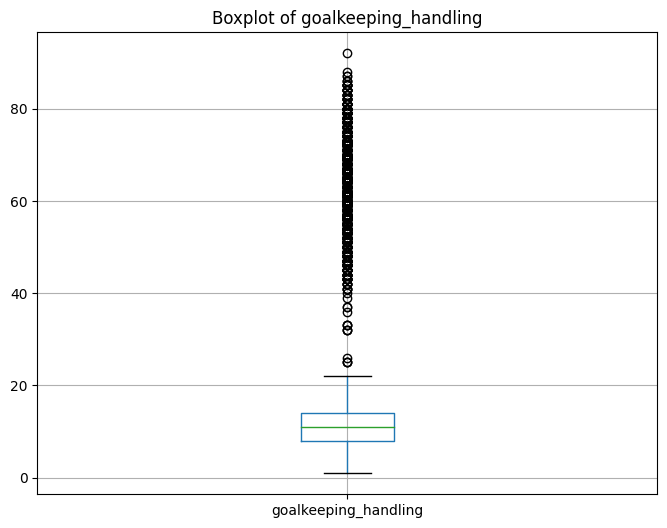

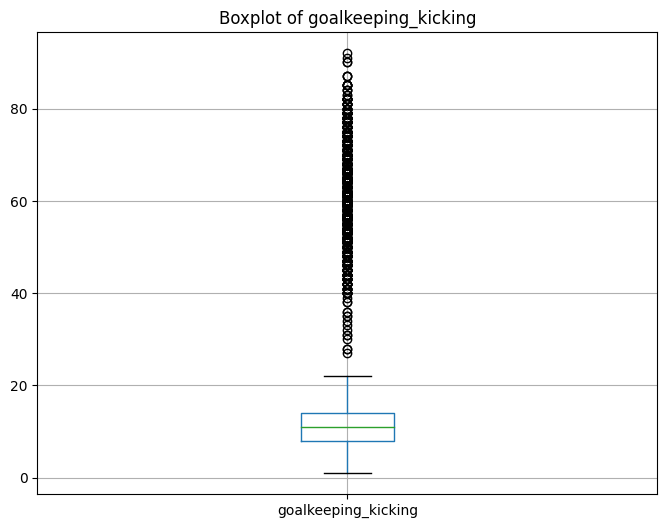

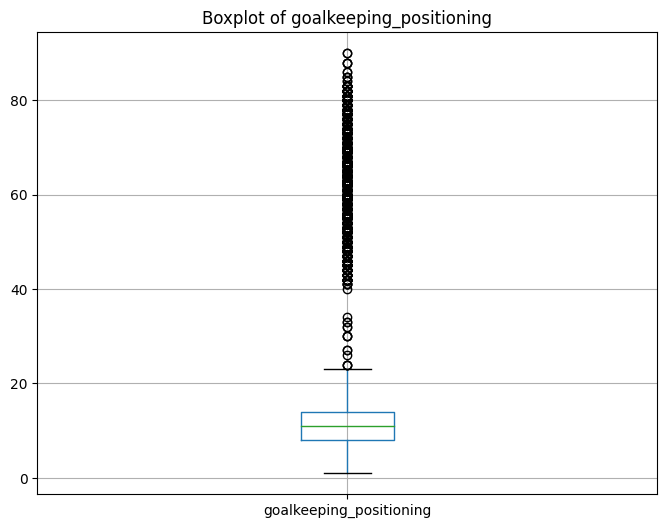

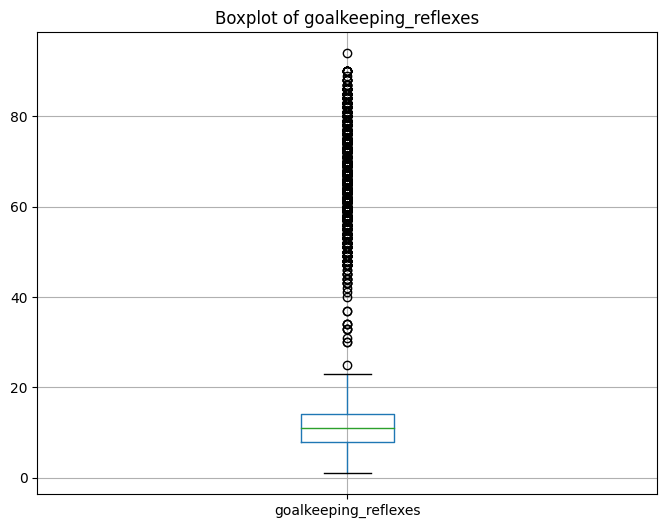

In [ ]:
import matplotlib.pyplot as plt

# Create boxplots for each numerical column separately
for column in filtered_numerical_cols.columns:
    plt.figure(figsize=(8, 6))
    filtered_numerical_cols.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

## Normalization: Treatment of outliers

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
scaled_numerical_cols = scaler.fit_transform(filtered_numerical_cols)

# Convert the scaled data back to a DataFrame
scaled_numerical_cols_df = pd.DataFrame(scaled_numerical_cols, columns=filtered_numerical_cols.columns)

# Display the information of the scaled DataFrame
scaled_numerical_cols_df.head()


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,pace,shooting,passing,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0.425926,0.509091,0.003789,0.006092,0.214286,0.346939,0.213115,0.635135,0.582278,0.506849,...,0.550562,0.583333,0.235955,0.238636,0.287356,0.133333,0.109890,0.142857,0.078652,0.075269
1,0.370370,0.381818,0.002017,0.002611,0.357143,0.367347,0.245902,0.810811,0.430380,0.452055,...,0.471910,0.357143,0.314607,0.318182,0.275862,0.122222,0.065934,0.087912,0.134831,0.150538
2,0.518519,0.509091,0.002945,0.004352,0.607143,0.224490,0.213115,0.729730,0.518987,0.630137,...,0.539326,0.738095,0.786517,0.647727,0.758621,0.077778,0.109890,0.087912,0.067416,0.086022
3,0.574074,0.563636,0.021089,0.013055,0.392857,0.346939,0.327869,0.675676,0.607595,0.657534,...,0.516854,0.583333,0.662921,0.670455,0.701149,0.111111,0.054945,0.142857,0.168539,0.096774
4,0.555556,0.690909,0.014338,0.002611,0.214286,0.612245,0.475410,0.635135,0.518987,0.520548,...,0.202247,0.154762,0.146067,0.170455,0.137931,0.777778,0.725275,0.637363,0.741573,0.784946


## Merging the data

In [ ]:
# Make a copy of encoded_categorical_cols_df and scaled_numerical_cols
encoded_categorical_copy = encoded_categorical_cols_df.copy()
scaled_numerical_copy = scaled_numerical_cols_df.copy()

# Merge both DataFrames
merged_data = pd.concat([encoded_categorical_copy, scaled_numerical_copy], axis=1)

# Display the merged DataFrame
merged_data


,short_name,long_name,player_positions,club_name,club_position,nationality_name,preferred_foot,work_rate,body_type,real_face,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,4241.0,4528.0,711.0,280.0,28.0,113.0,0.0,8.0,4.0,0.0,...,0.550562,0.583333,0.235955,0.238636,0.287356,0.133333,0.109890,0.142857,0.078652,0.075269
1,4370.0,4560.0,523.0,496.0,28.0,46.0,0.0,2.0,1.0,0.0,...,0.471910,0.357143,0.314607,0.318182,0.275862,0.122222,0.065934,0.087912,0.134831,0.150538
2,9976.0,11636.0,634.0,217.0,17.0,28.0,1.0,8.0,3.0,0.0,...,0.539326,0.738095,0.786517,0.647727,0.758621,0.077778,0.109890,0.087912,0.067416,0.086022
3,8929.0,17307.0,486.0,700.0,12.0,85.0,0.0,0.0,4.0,0.0,...,0.516854,0.583333,0.662921,0.670455,0.701149,0.111111,0.054945,0.142857,0.168539,0.096774
4,13213.0,13480.0,383.0,709.0,28.0,78.0,1.0,8.0,2.0,0.0,...,0.202247,0.154762,0.146067,0.170455,0.137931,0.777778,0.725275,0.637363,0.741573,0.784946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,7817.0,8726.0,902.0,610.0,27.0,8.0,1.0,8.0,4.0,0.0,...,0.550562,0.583333,0.247191,0.238636,0.241379,0.055556,0.142857,0.120879,0.078652,0.096774
24996,10653.0,10353.0,383.0,280.0,28.0,8.0,1.0,8.0,5.0,0.0,...,0.202247,0.583333,0.247191,0.238636,0.229885,0.644444,0.615385,0.604396,0.651685,0.645161
24997,4494.0,4796.0,634.0,569.0,17.0,54.0,1.0,6.0,4.0,0.0,...,0.606742,0.595238,0.674157,0.681818,0.655172,0.088889,0.164835,0.109890,0.123596,0.118280
24998,5374.0,5362.0,710.0,802.0,23.0,123.0,1.0,1.0,4.0,0.0,...,0.685393,0.583333,0.235955,0.147727,0.195402,0.111111,0.164835,0.164835,0.089888,0.107527


In [ ]:
# Fill NaNs with the mean of each column
merged_data = merged_data.fillna(merged_data.mean())

In [ ]:
features_to_cluster = [
    'overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'player_positions', 'height_cm', 'weight_kg', 'age',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_volleys',
    'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle'
]

merged_data = merged_data[features_to_cluster]

**Reason for selecting these Clusters**

**Pace:** Speed is a crucial aspect of a player's game, and it can greatly impact their performance on the field.

**Shooting:** A player's shooting ability is essential for scoring goals, and it's a key factor in determining their attacking prowess.

**Passing:**Passing is a fundamental skill in football, and it's essential for maintaining possession and creating scoring opportunities.

**Dribbling:** Dribbling is a critical aspect of a player's ability to beat opponents and create space on the field.

**Defending:** A player's defensive skills are vital for preventing opponents from scoring, and it's a key factor in determining their overall defensive capabilities.

**Attacking Abilities**

**attacking_crossing:** A player's ability to deliver accurate crosses into the box is crucial for creating scoring opportunities.
attacking_finishing: A player's finishing ability is essential for converting chances into goals.
**attacking_heading_accuracy:** A player's ability to head the ball accurately is important for scoring goals from set pieces and crosses.
**attacking_volleys:** A player's ability to score goals from volleys is a valuable asset in attacking situations.

**Defensive Abilities**

**defending_marking_awareness:** A player's ability to mark opponents and anticipate their movements is critical for preventing scoring opportunities.
defending_standing_tackle: A player's ability to win the ball back from opponents is essential for regaining possession.
**defending_sliding_tackle:** A player's ability to make sliding tackles is important for preventing opponents from advancing with the ball.

**Physical Attributes**

**physic:** A player's physical attributes, such as strength, power, and endurance, can greatly impact their performance on the field.


## K Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

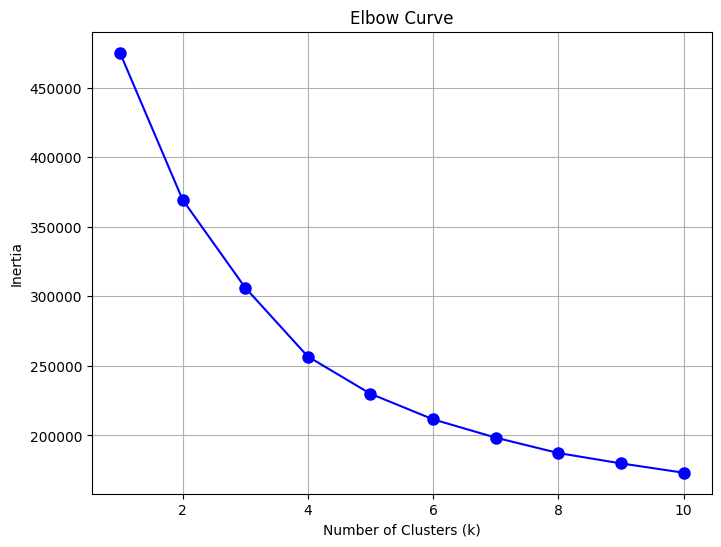

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assume merged_data_clean is your cleaned dataset (after handling NaNs)

# Step 1: Standardize the data (optional but recommended)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data)

# Step 2: Define the range of k values you want to test
k_values = range(1, 11)

# Step 3: Initialize an empty list to store inertia values (sum of squared distances)
inertia = []

# Step 4: Run KMeans for each k value and compute inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Step 5: Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()


it appears to be around 4 clusters.
Beyond this point, additional clusters contribute less to reducing inertia.
Consider using 4 clusters for your project.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import time
import psutil

# Define a function to perform K-means clustering with different K values
def kmeans_clustering(data, k_values):
    results = []
    for k in k_values:
        start_time = time.time()

        # Perform K-means clustering
        kmeans = KMeans(n_clusters=k, random_state=0)
        cluster_labels = kmeans.fit_predict(data)

        # Calculate silhouette score
        silhouette = silhouette_score(data, cluster_labels)

        # Calculate Davies-Bouldin score
        davies_bouldin = davies_bouldin_score(data, cluster_labels)

         # Calculate inertia (sum of squared distances of samples to their closest cluster center)
        inertia = kmeans.inertia_

        # Calculate time taken
        end_time = time.time()
        time_taken = end_time - start_time

        # Calculate memory usage
        memory_usage = psutil.Process().memory_info().rss / 1024 ** 2  # in MB

        # Store results
        results.append({
            'K': k,
            'Silhouette Score': silhouette,
            'Davies-Bouldin Score': davies_bouldin,
            'Inertia': inertia,
            'Time Taken (seconds)': time_taken,
            'Memory Usage (MB)': memory_usage

        })

    return results

# Define the K values
k_values = [2, 3, 4, 5]

# Perform K-means clustering for merged_data
clustering_results = kmeans_clustering(merged_data, k_values)

# Display results
results_df = pd.DataFrame(clustering_results)
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

   K  Silhouette Score  Davies-Bouldin Score       Inertia  \
0  2          0.691344              0.451246  4.485880e+08   
1  3          0.670803              0.384372  1.929443e+08   
2  4          0.707490              0.362610  8.162556e+07   
3  5          0.702096              0.354763  5.346807e+07   

   Time Taken (seconds)  Memory Usage (MB)  
0              7.367076        1189.347656  
1              7.856609        1189.316406  
2              6.802859        1189.425781  
3              7.882543        1189.296875  


In this case, K=4 seems to offer a good balance between the Silhouette and Davies-Bouldin scores. However, further exploration and visualization might be necessary to make a definitive decision.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


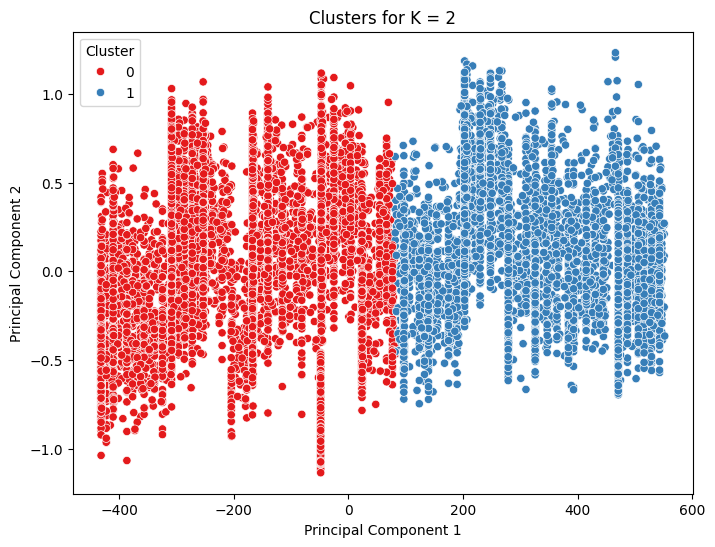

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


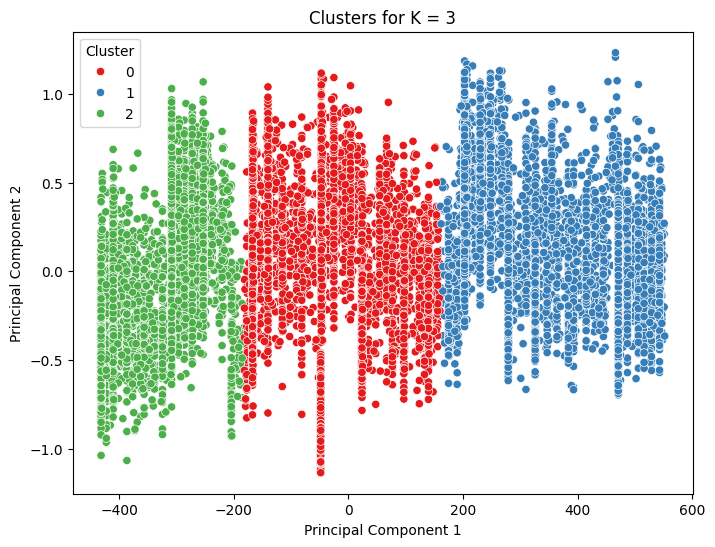

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


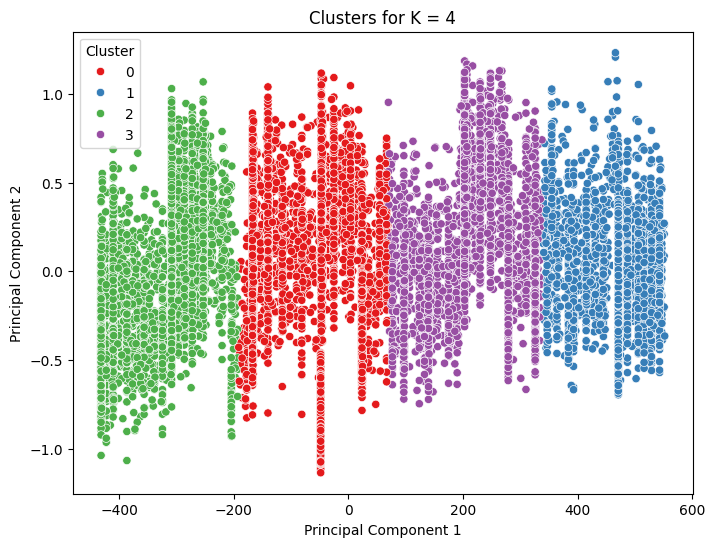

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


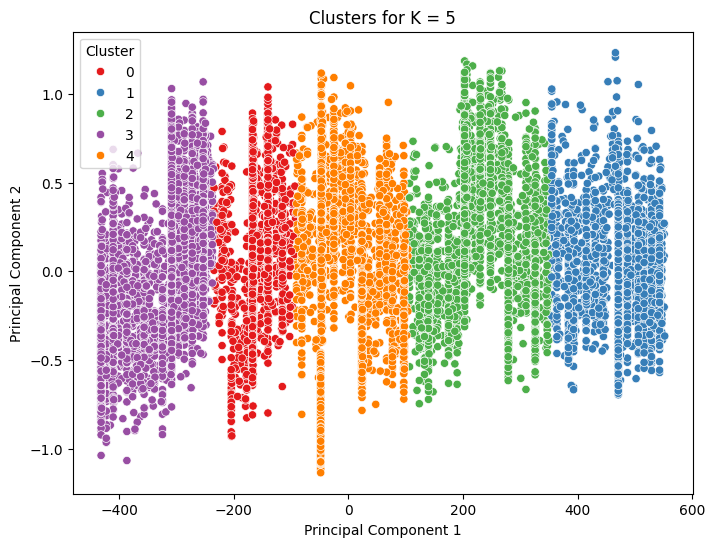

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to visualize clusters
def visualize_clusters(data, cluster_labels, title):
    # Apply PCA to reduce dimensionality to 2D
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    # Create a DataFrame for visualization
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    pca_df['Cluster'] = cluster_labels

    # Plot clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', legend='full')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Visualize clusters for all values of K
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(merged_data)
    title = f'Clusters for K = {k}'
    visualize_clusters(merged_data, cluster_labels, title)


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import time
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
def dbscan_clustering(data, eps_values, min_samples=5):
    results = []
    for eps in eps_values:
        start_time = time.time()

        # Perform DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(data)

        # Calculate time taken
        end_time = time.time()
        time_taken = end_time - start_time

        # Calculate memory usage
        memory_usage = psutil.Process().memory_info().rss / 1024 ** 2  # in MB

        # Count the number of clusters (excluding noise)
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)

        # Store results
        results.append({
            'Eps': eps,
            'Number of Clusters': n_clusters,
            'Number of Noise Points': n_noise,
            'Time Taken (seconds)': time_taken,
            'Memory Usage (MB)': memory_usage
        })

    return results

# Define the eps values to test
eps_values = [0.3, 0.5, 0.7, 1.0]  # Adjust these values based on your data

# Perform DBSCAN clustering for merged_data
dbscan_results = dbscan_clustering(merged_data, eps_values)

# Display results
results_df = pd.DataFrame(dbscan_results)
print(results_df)


   Eps  Number of Clusters  Number of Noise Points  Time Taken (seconds)  \
0  0.3                  99                    8370              2.447223   
1  0.5                 177                    2150              4.482163   
2  0.7                 256                    1283              3.474124   
3  1.0                 276                    1127              3.601426   

   Memory Usage (MB)  
0         562.207031  
1         759.171875  
2         996.929688  
3        1175.875000  


Increasing eps leads to more clusters and fewer noise points: As the radius for considering neighbors increases, more data points are included in clusters, resulting in a higher number of clusters and a lower number of outliers.
Computational Efficiency: A larger eps value generally requires more computational resources due to the increased complexity of the algorithm.

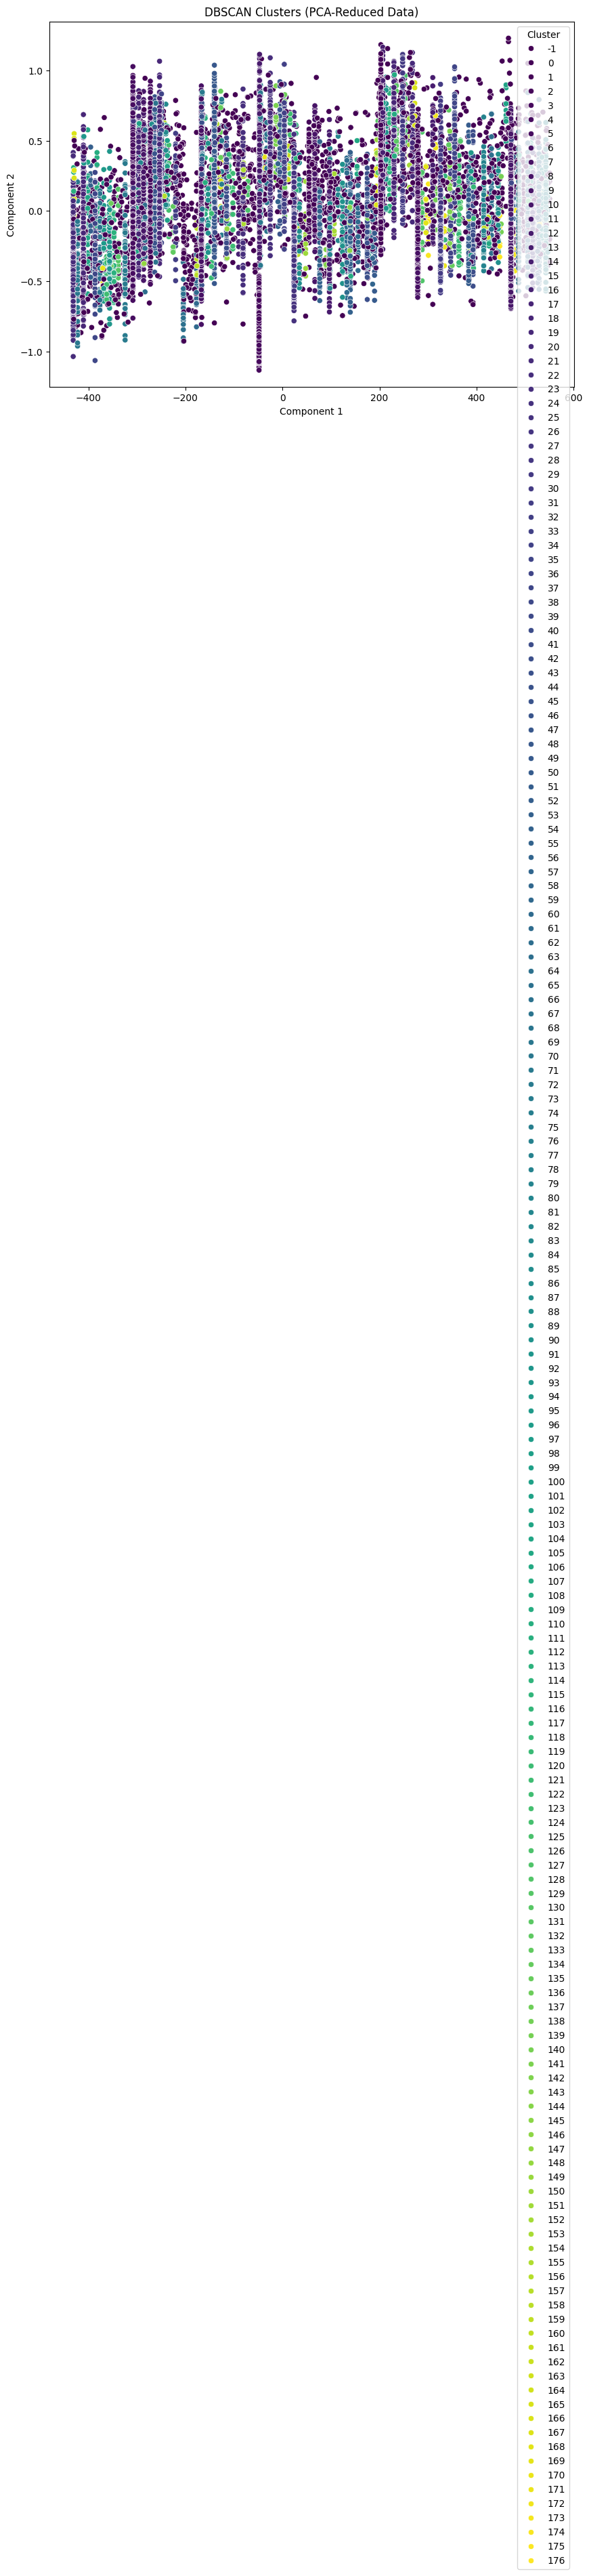

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization (optional, use PCA or t-SNE)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(merged_data)

# Apply DBSCAN with chosen parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(merged_data)

# Create a DataFrame for plotting
plot_data = pd.DataFrame(reduced_data, columns=['Component 1', 'Component 2'])
plot_data['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Component 1', y='Component 2', hue='Cluster', palette='viridis', data=plot_data, legend='full')
plt.title('DBSCAN Clusters (PCA-Reduced Data)')
plt.show()


**PCA Analysis**

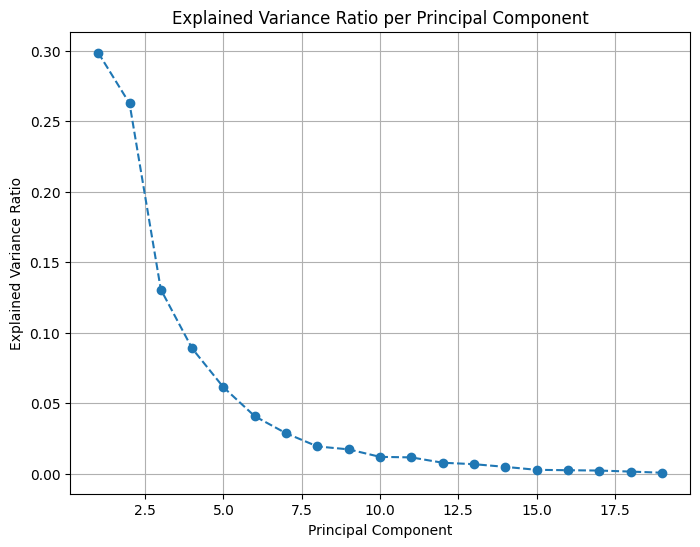

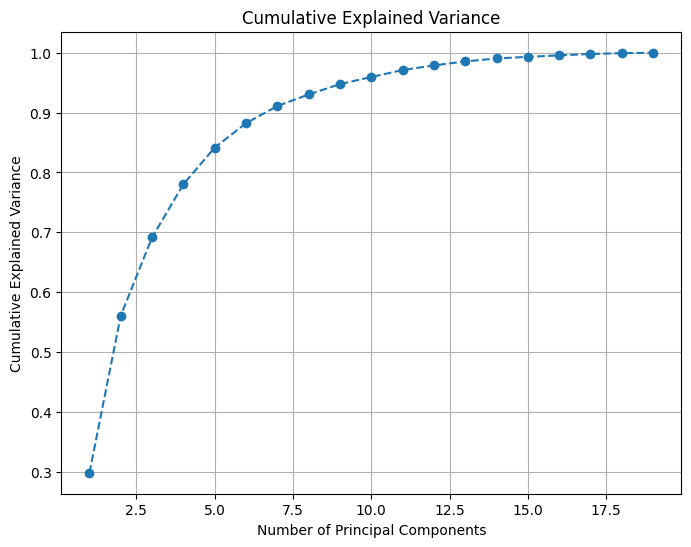

Number of components to retain for 95% variance: 10


In [39]:
# prompt: further to this give me code for pca analysis

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Choose the number of components based on desired explained variance (e.g., 95%)
desired_variance = 0.95
num_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print("Number of components to retain for 95% variance:", num_components)

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(num_components)])

# You can now use pca_df for further analysis or visualization
